# Digits Classification

## Load packages

In [129]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import v_measure_score

import matplotlib.pyplot as plt 

## Utils

In [2]:
def cluster2digit(target, cluster):
    '''Map clusters to coresponding digit.'''
    cmap = {
        x: np.bincount(target[cluster == x]).argmax()
        for x in np.unique(cluster)
    }
    def mapper(values):
        return np.array([ cmap[x] for x in values])
    return mapper

## Dataset processing

In [3]:
digits = datasets.load_digits()

X = scale(digits.data)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

In [4]:
X_train = X
y_train = y

In [5]:
print("Training sample: %d" % X_train.shape[0])
print("Test sample: %d" % X_test.shape[0])

Training sample: 1797
Test sample: 180


In [131]:
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

### Plot a number

<Figure size 432x288 with 0 Axes>

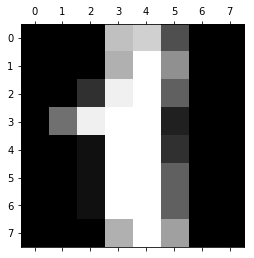

In [6]:
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

## K-means

In [8]:
km = KMeans(n_clusters=10, init="k-means++", n_init=10, max_iter=300, tol=1e-04, random_state=0)
km_mapper = cluster2digit(y_train, km.fit_predict(X_train))

In [9]:
y_train_yhat = km_mapper(km.predict(X_train))
y_test_yhat = km_mapper(km.predict(X_test))

In [10]:
pd.crosstab(y_train, y_train_yhat)

col_0,0,1,2,3,4,6,7,8
row_0,,,,,,,,
0,177,0,0,0,1,0,0,0
1,0,58,27,0,1,0,0,96
2,0,5,128,6,0,0,1,37
3,0,0,14,152,0,0,8,9
4,0,8,0,0,157,0,13,3
5,0,2,43,72,2,2,2,59
6,1,1,0,0,0,175,0,4
7,0,3,8,0,0,0,168,0
8,0,15,9,46,0,3,2,99


In [11]:
pd.Series(y_train == y_train_yhat).value_counts()/y_train.shape[0]

True     0.619922
False    0.380078
dtype: float64

In [12]:
v_measure_score(y_train, y_train_yhat)

0.6254132661845883

In [13]:
pd.crosstab(y_test, y_test_yhat)

col_0,0,1,2,3,4,6,7,8
row_0,,,,,,,,
0,18,0,0,0,0,0,0,0
1,0,7,2,0,1,0,0,8
2,0,2,12,2,0,0,0,2
3,0,0,1,14,0,0,1,2
4,0,1,0,0,14,0,2,1
5,0,0,6,6,0,0,0,6
6,0,0,0,0,0,18,0,0
7,0,0,0,0,0,0,18,0
8,0,1,1,4,0,1,1,10


In [14]:
pd.Series(y_test == y_test_yhat).value_counts()/y_test.shape[0]

True     0.616667
False    0.383333
dtype: float64

In [15]:
v_measure_score(y_test, y_test_yhat)

0.6329049398877452

## Agglomerative clustering

In [29]:
ac = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="average")
yhat = ac.fit_predict(X) # not possible to apply algorithm on new sample

In [30]:
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
pd.Series(yhat).value_counts()

0    1781
3       4
1       3
6       2
2       2
9       1
8       1
7       1
5       1
4       1
dtype: int64

Agglomartive clustering does not do particulary well on this task.

## Algomerative Clustering + PCA

In [99]:
pca = PCA(n_components=30).fit(X)

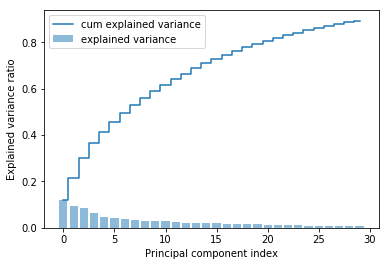

In [100]:
n_features = pca.explained_variance_ratio_.shape[0]
plt.bar(range(0, n_features), pca.explained_variance_ratio_, alpha=0.5, align="center", label="explained variance")
plt.step(range(0, n_features), np.cumsum(pca.explained_variance_ratio_), where="mid", label="cum explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.show()

In [101]:
X_pca = pca.transform(X)

In [102]:
ac = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="average")
yhat = ac.fit_predict(X_pca) # not possible to apply algorithm on new sample

In [103]:
pd.Series(yhat).value_counts()

4    1767
3       8
1       8
8       5
0       3
2       2
9       1
7       1
6       1
5       1
dtype: int64

Agglomerative clustering + PCA does not work.

## DBSCAN

In [171]:
db = DBSCAN(eps=1, min_samples=10, metric="euclidean")
yhat = db.fit_predict(X)

In [172]:
pd.Series(yhat).value_counts()

-1    1797
dtype: int64

DBSCAN does not work.

## Spectral Clustering

In [179]:
sc = SpectralClustering(n_clusters=10, n_jobs=3)
# yhat = sc.fit_predict(X) # time-consuming